# Visualizations

- Anscombe's Quartet is a collection of four datasets, each having an $x$ and $y$ dimension. 
- While their basic statistics look similar, they're not quite identical.

In [ ]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

# Load Data
Source: [Wikipedia](https://en.wikipedia.org/wiki/Anscombe's_quartet)

In [ ]:
data = pd.DataFrame({'x1': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
     'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     'x2': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0,],
     'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     'x3': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0,],
     'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
     'x4': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
     'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})
data

For each of the four datasets (i.e., for $(x_1, y_1)$, for $(x_2, y_2)$, etc), compute some basic statistics:

For $x_i$ and $y_i$, compute:
- the mean and the standard deviation,
- (*) the correlation between $x_i$ and $y_i$,
- (**) the slope $a_i$ and intercept $b_i$ for the trendline $y = a x + b$, using linear regression,
- (**) the standard error of the aforementioned linear regression.

We will cover linear regression in the next lessons, so don't break your head over it if you don't know, or don't remember exactly, how to do that.

In [ ]:
print "Basic statistics"
trendlines = []
for i in xrange(1, 5):
    x, y = "x" + str(i), "y" + str(i)
    df = data[[x, y]]
    x_mean, y_mean = df.mean()
    x_std, y_std = df.std()
    slope, intercept, r_value, p_value, std_err = linregress(df)
    trendlines.append((slope, intercept))
    print "%d) x: avg %4.2f, std %4.2f;  y: avg %4.2f, std %4.2f;  " \
        "y = %4.2fx + %4.2f;  corr %4.2f, err %4.2f" % \
        (i, x_mean, x_std, y_mean, y_std, slope, intercept, r_value, std_err)

These data points must be exactly the same..? 

Plot each dataset.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
for i in xrange(1, 5):
    x, y = "x" + str(i), "y" + str(i)
    data.plot(kind='scatter', x=x, y=y, ax=axes[i-1], s=50)
    slope, intercept = trendlines[i - 1]
    axes[i - 1].plot([2, 18], [intercept + 2 * slope, intercept + 18 * slope], ':')

## Exercises

In [1]:
from matplotlib import pyplot as plt  
%matplotlib inline  

In [3]:
import seaborn as sb

In [2]:
# Specify the correct path to the folder in `path_to_data`.
path_to_data = '/Users/ruben/Downloads/lahman-csv_2014-02-14/' 

#### Basic plotting

Plot the function $f(x) = x^3 - 2x^2 + 4$ on the domain $[-5, 5]$.

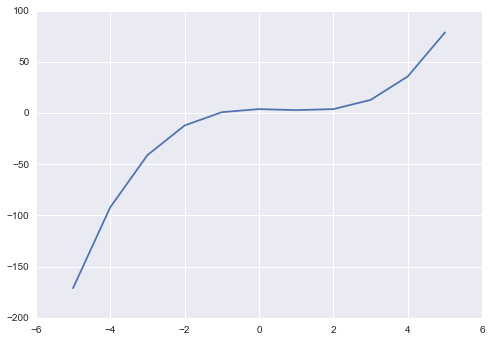

In [4]:
def func(x):
    return x ** 3 - 2 * x ** 2 + 4

domain = range(-5, 6)
f = plt.plot(domain, [func(x) for x in domain])

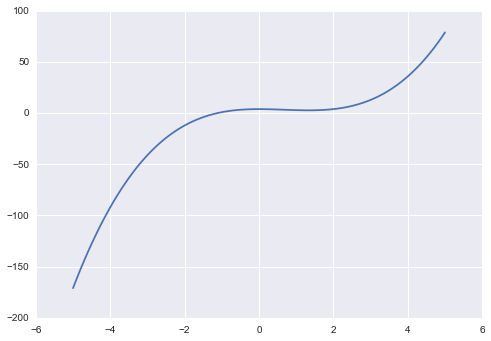

In [5]:
# Note that you can also do like this (advanced)
func = lambda x: x ** 3 - 2 * x ** 2 + 4  # fancy lambda notation
domain = [x/10. for x in xrange(-50, 51)]  # finer resolution
f = plt.plot(domain, [func(x) for x in domain])

Let's get some arbitrary dataset (see below)

In [6]:
import numpy as np  # import numpy -- we will cover this later
import pandas as pd
N = 1000  # number of dots
x = np.random.random(N)  # get N random values between 0 and 1
df = pd.DataFrame(dict(
        A=x,
        B=func(x),
        C=func(x) / func(x - 1)))
df.head()

,A,B,C
0,0.197529,3.929672,1.790021
1,0.521130,3.598373,1.048613
2,0.749154,3.297985,0.854762
3,0.720638,3.335602,0.872712
4,0.999972,3.000028,0.750007


- Plot A against B, A against C, and B against C

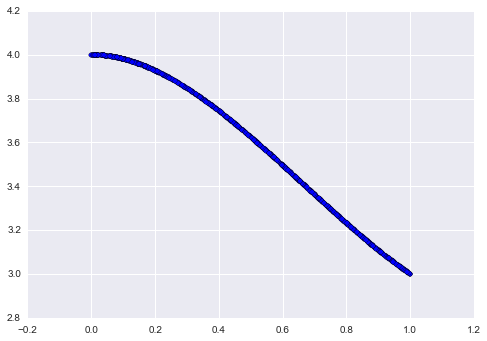

In [7]:
plt.scatter(df.A, df.B)

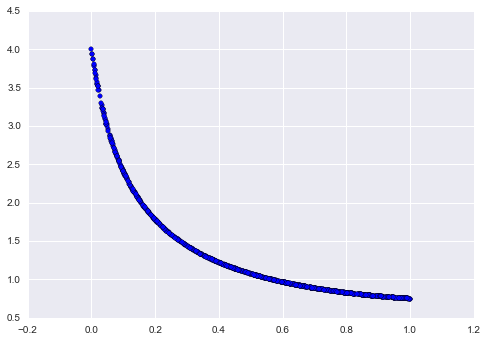

In [8]:
plt.scatter(df.A, df.C)

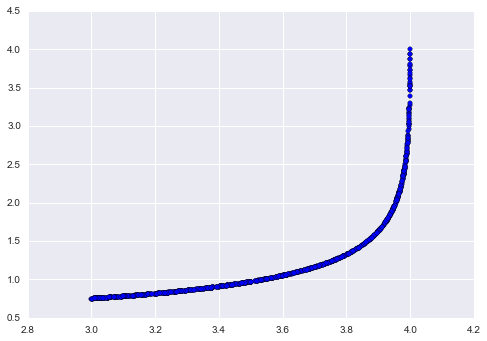

In [9]:
plt.scatter(df.B, df.C)

- Plot A against B, and make the size of the dots correspond with C

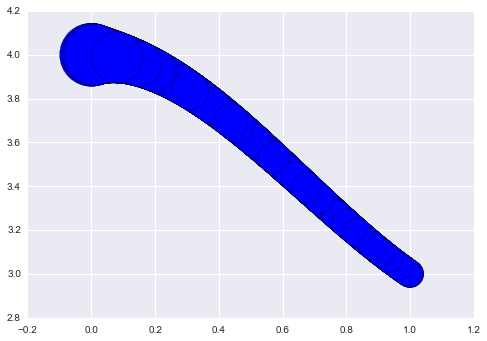

In [10]:
f = plt.scatter(df.A, df.B, 1000 * df.C)

- Plot B against C, and make the _color_ of the dots correspond with A. (This should result in a grey scale.)


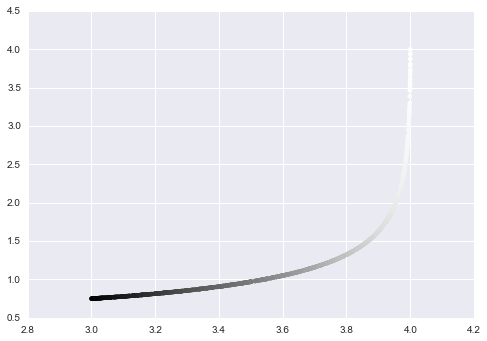

In [11]:
f = plt.scatter(df.B, df.C, c=df.A, linewidths=0)

#### Pandas plots

Load the Lahman baseball datasets.

In [12]:
# Loading the Baseball datasets
master = pd.read_csv(path_to_data + 'Master.csv')
batting = pd.read_csv(path_to_data + 'Batting.csv')
salaries = pd.read_csv(path_to_data + 'Salaries.csv')

- How does the average salary of baseball players increase over time?

In [13]:
# Gather all players' salaries per year
player_salaries_per_year = salaries.groupby(['playerID', 'yearID']).salary.sum()
player_salaries_per_year.head()

playerID   yearID
aardsda01  2004       300000
           2007       387500
           2008       403250
           2009       419000
           2010      2750000
Name: salary, dtype: int64

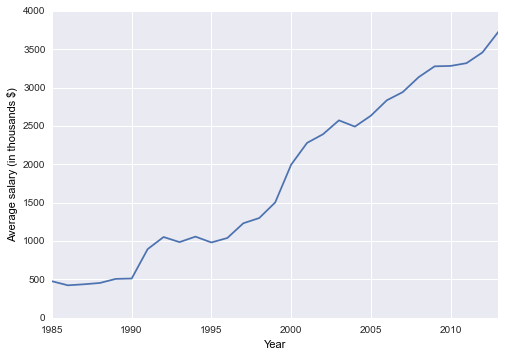

In [14]:
# Per year, take average of all player's salary
annual_salaries = player_salaries_per_year.mean(level=1)  # level=1 means, take mean per year
annual_salaries_K = annual_salaries / 1000.  # divide by 1000 to show thousands of dollars (easier to read in plot)
f = annual_salaries_K.plot()
f = plt.xlabel('Year'), plt.ylabel('Average salary (in thousands $)')
# f = salaries.groupby('yearID').salary.sum().plot()

In case you haven't done them already, complete teh visualizations exercises from the *Intro to Pandas* notebook.

- Produce a histogram of player salaries.
- Plot salary against a few statistics of the batting statistics (HR, RBI, R) - are any of these well-correlated?

(Solutions are already given in the `into_to_pandas_solutions.ipynb` notebook of last class.)

In [15]:
# Loading the Baseball datasets
master = pd.read_csv(path_to_data + 'Master.csv')
batting = pd.read_csv(path_to_data + 'Batting.csv')
salaries = pd.read_csv(path_to_data + 'Salaries.csv')

In [16]:
# Solutions are already given in the `into_to_pandas_solutions.ipynb` notebook of last class.

## Further reading

- <b>Pandas</b>:
<a href="http://pandas.pydata.org/pandas-docs/stable/10min.html" target="_blank">10 Minutes to Pandas</a> and
<a href="http://pandas.pydata.org/pandas-docs/stable/tutorials.html" target="_blank">tutorials</a>
of the official documentation<br>
Also recommended is the book <i>Python for Data Analysis</i>, O'Reilly Media.
- <b>Matplotlib pyplot</b>:
<a href="http://matplotlib.org/users/pyplot_tutorial.html" target="_blank">tutorial</a> 
of the official documentation
- <b>Seaborn</b>:
<a href="http://stanford.edu/~mwaskom/software/seaborn/" target="_blank">website</a>